# Problems for this week:


1. Filter the data to include only weekdays (Monday to Friday) and
plot a line graph showing the pedestrian counts for each day of the
week.
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

----- Write your code below this after running above above code-----------

2. Track pedestrian counts on the Brooklyn Bridge for the year 2019
and analyze how different weather conditions influence pedestrian
activity in that year. Sort the pedestrian count data by weather
summary to identify any correlations( with a correlation matrix)
between weather patterns and pedestrian counts for the selected year.

-This question requires you to show the relationship between a
numerical feature(Pedestrians) and a non-numerical feature(Weather
Summary). In such instances we use Encoding. Each weather condition
can be encoded as numbers( 0,1,2..). This technique is called One-hot
encoding.

-Correlation matrices may not always be the most suitable
visualization method for relationships involving categorical
datapoints, nonetheless this was given as a question to help you
understand the concept better.

3. Implement a custom function to categorize time of day into morning,
afternoon, evening, and night, and create a new column in the
DataFrame to store these categories. Use this new column to analyze
pedestrian activity patterns throughout the day.

-Students can also show plots analyzing activity.

# Answer Assignment 1:
Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week. import pandas as pd import matplotlib.pyplot as plt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set up notebook to show all outputs in a cell, not only last one

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

In [6]:
df.shape

(16057, 12)

In [5]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week. import pandas as pd import matplotlib.pyplot as plt

In [27]:
# convert 'hour_beinning' string to a “native” date/time format
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

#create column for hours from the value in hour_beginning
df['hour'] = df['hour_beginning'].dt.hour
#create column for day name from the value in hour_beginning
df['day_name'] = df['hour_beginning'].dt.day_name()
#create column for year from the value in hour_beginning
df['year'] = df['hour_beginning'].dt.year


df.head()


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,day_name,year
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,Tuesday,2019
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",22,Tuesday,2019
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",23,Tuesday,2019
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",21,Tuesday,2019
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,Monday,2019


In [22]:
#group by day of the week and calculate the total pedestrian count
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = df.groupby('day_name')['Pedestrians'].sum().reindex(days).iloc[:-2]
weekday_counts

,Pedestrians
day_name,
Monday,1481435
Tuesday,1394963
Wednesday,1310900
Thursday,1370880
Friday,1588068


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Day of the Week (Monday, Friday)')

Text(0, 0.5, 'Total Pedestrian Count')

Text(0.5, 1.0, 'Pedestrian Counts on Weekdays')

([<matplotlib.axis.XTick at 0x7c82020af7c0>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday')])

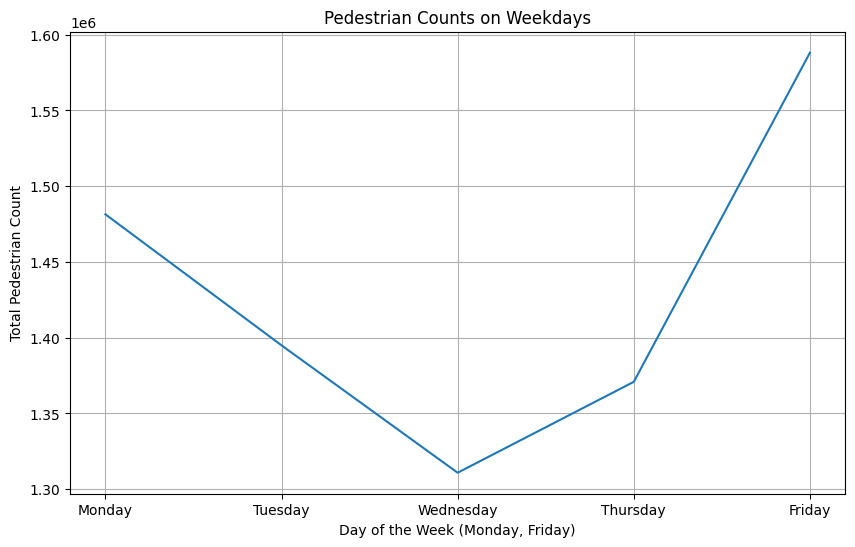

In [23]:
# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(weekday_counts.index, weekday_counts.values)
plt.xlabel('Day of the Week (Monday, Friday)')
plt.ylabel('Total Pedestrian Count')
plt.title('Pedestrian Counts on Weekdays')
plt.xticks(range(5), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.grid(True)
plt.show()

# Answer Assignment 2
Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

-This question requires you to show the relationship between a numerical feature(Pedestrians) and a non-numerical feature(Weather Summary). In such instances we use Encoding. Each weather condition can be encoded as numbers( 0,1,2..). This technique is called One-hot encoding.

-Correlation matrices may not always be the most suitable visualization method for relationships involving categorical datapoints, nonetheless this was given as a question to help you understand the concept better.

Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

In [40]:
df = df.sort_values(by='hour_beginning') #Arranging data in chronological order first and then proceeding to forward/back fill
df.head()
df['weather_summary'] = df['weather_summary'].fillna(method="ffill")

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,day_name,year
8846,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,Sunday,2017
9473,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,Sunday,2017
10098,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,Sunday,2017
10733,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,Sunday,2017
11527,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,Sunday,2017


<ipython-input-40-6a3d40ef8ea7>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['weather_summary'] = df['weather_summary'].fillna(method="ffill")


In [47]:
#filter dataframe to only include data from 2019
df_2019 = df[df['year'] == 2019]
df_2019.isnull().sum()

,0
hour_beginning,0
location,0
Pedestrians,0
Towards Manhattan,0
Towards Brooklyn,0
weather_summary,0
temperature,14
precipitation,14
lat,0
long,0


Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

In [46]:
weather = df.groupby('weather_summary')['Pedestrians'].sum()
weather

,Pedestrians
weather_summary,
clear-day,4335807
clear-night,385697
cloudy,1287759
fog,17820
partly-cloudy-day,4506810
partly-cloudy-night,235449
rain,235674
sleet,1651
snow,18179


In [58]:
#ID unique weather_summary values and enumerate
weather_summary_enum = {summary: i for i, summary in enumerate(df_2019['weather_summary'].unique())}
#weather_summary_enum

# create encoded column of weather_summary
df_2019['weather_summary_encoded'] = df_2019['weather_summary'].map(weather_summary_enum)
#df_2019.sample(10)


{'rain': 0,
 'cloudy': 1,
 'partly-cloudy-night': 2,
 'partly-cloudy-day': 3,
 'clear-night': 4,
 'clear-day': 5,
 'snow': 6,
 'sleet': 7,
 'fog': 8,
 'wind': 9}

<ipython-input-58-ab8c9c135b90>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['weather_summary_encoded'] = df_2019['weather_summary'].map(weather_summary_enum)


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,day_name,year,weather_summary_encoded
5896,2019-05-14 14:00:00,Brooklyn Bridge,1373,546,827,cloudy,51.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",14,Tuesday,2019,1
3955,2019-10-21 20:00:00,Brooklyn Bridge,9,6,3,clear-night,58.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",20,Monday,2019,4
7182,2019-01-30 03:00:00,Brooklyn Bridge,0,0,0,partly-cloudy-night,25.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,Wednesday,2019,2
5401,2019-08-10 14:00:00,Brooklyn Bridge,3363,1544,1819,partly-cloudy-day,80.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",14,Saturday,2019,3
6334,2019-12-25 19:00:00,Brooklyn Bridge,9,9,0,clear-night,37.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",19,Wednesday,2019,4
1257,2019-05-23 02:00:00,Brooklyn Bridge,1,0,1,partly-cloudy-night,65.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,Thursday,2019,2
6274,2019-11-28 22:00:00,Brooklyn Bridge,4,3,1,clear-night,38.0,0.0,40.708164,-73.999509,Black Friday,"(40.7081639691088, -73.9995087014816)",22,Thursday,2019,4
3622,2019-11-28 03:00:00,Brooklyn Bridge,0,0,0,partly-cloudy-night,48.0,0.0,40.708164,-73.999509,Thanksgiving Day,"(40.7081639691088, -73.9995087014816)",3,Thursday,2019,2
3676,2019-10-20 06:00:00,Brooklyn Bridge,27,22,5,clear-night,44.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",6,Sunday,2019,4
683,2019-05-24 14:00:00,Brooklyn Bridge,2534,1194,1340,partly-cloudy-day,75.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",14,Friday,2019,3


In [62]:
df_2019['weather_summary'].unique() #see unique categories

array(['rain', 'cloudy', 'partly-cloudy-night', 'partly-cloudy-day',
       'clear-night', 'clear-day', 'snow', 'sleet', 'fog', 'wind'],
      dtype=object)

In [64]:
df_encoded.columns.values.tolist() #list columns by title

['hour_beginning',
 'location',
 'Pedestrians',
 'Towards Manhattan',
 'Towards Brooklyn',
 'temperature',
 'precipitation',
 'lat',
 'long',
 'events',
 'Location1',
 'hour',
 'day_name',
 'year',
 'weather_summary_encoded',
 'weather_summary_clear-day',
 'weather_summary_clear-night',
 'weather_summary_cloudy',
 'weather_summary_fog',
 'weather_summary_partly-cloudy-day',
 'weather_summary_partly-cloudy-night',
 'weather_summary_rain',
 'weather_summary_sleet',
 'weather_summary_snow',
 'weather_summary_wind']

In [78]:
#using get_dummies to one-hot encode
df_encoded = pd.get_dummies(df_2019, columns=['weather_summary'])
#df_encoded = pd.get_dummies(df_2019, dtype=int, columns=['weather_summary']) #if prefer to see True/False as type int)
df_encoded

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,temperature,precipitation,lat,long,events,...,weather_summary_clear-day,weather_summary_clear-night,weather_summary_cloudy,weather_summary_fog,weather_summary_partly-cloudy-day,weather_summary_partly-cloudy-night,weather_summary_rain,weather_summary_sleet,weather_summary_snow,weather_summary_wind
222,2019-01-01 00:00:00,Brooklyn Bridge,144,24,120,46.0,0.1363,40.708164,-73.999509,New Year's Day,...,False,False,False,False,False,False,True,False,False,False
2091,2019-01-01 01:00:00,Brooklyn Bridge,39,20,19,47.0,0.0490,40.708164,-73.999509,New Year's Day,...,False,False,False,False,False,False,True,False,False,False
3924,2019-01-01 02:00:00,Brooklyn Bridge,15,10,5,47.0,0.0279,40.708164,-73.999509,New Year's Day,...,False,False,False,False,False,False,True,False,False,False
5688,2019-01-01 03:00:00,Brooklyn Bridge,14,10,4,48.0,0.0044,40.708164,-73.999509,New Year's Day,...,False,False,True,False,False,False,False,False,False,False
7954,2019-01-01 04:00:00,Brooklyn Bridge,8,6,2,50.0,0.0003,40.708164,-73.999509,New Year's Day,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,2019-12-31 19:00:00,Brooklyn Bridge,11,9,2,43.0,0.0000,40.708164,-73.999509,NaN,...,False,False,True,False,False,False,False,False,False,False
6542,2019-12-31 20:00:00,Brooklyn Bridge,15,14,1,43.0,0.0000,40.708164,-73.999509,NaN,...,False,False,True,False,False,False,False,False,False,False
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,42.0,0.0036,40.708164,-73.999509,NaN,...,False,False,True,False,False,False,False,False,False,False
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,42.0,0.0005,40.708164,-73.999509,NaN,...,False,False,True,False,False,False,False,False,False,False


In [79]:
# Creating a correlation matrix
correlation_matrix = df_encoded[['Pedestrians', 'weather_summary_clear-day',
 'weather_summary_clear-night',
 'weather_summary_cloudy',
 'weather_summary_fog',
 'weather_summary_partly-cloudy-day',
 'weather_summary_partly-cloudy-night',
 'weather_summary_rain',
 'weather_summary_sleet',
 'weather_summary_snow',
 'weather_summary_wind']].corr()
correlation_matrix

,Pedestrians,weather_summary_clear-day,weather_summary_clear-night,weather_summary_cloudy,weather_summary_fog,weather_summary_partly-cloudy-day,weather_summary_partly-cloudy-night,weather_summary_rain,weather_summary_sleet,weather_summary_snow,weather_summary_wind
Pedestrians,1.000000,0.339091,-0.377989,-0.081651,-0.026457,0.497546,-0.282389,-0.139055,-0.017091,-0.034052,-0.000170
weather_summary_clear-day,0.339091,1.000000,-0.228241,-0.224349,-0.022021,-0.221149,-0.175773,-0.119958,-0.013268,-0.028968,-0.009380
weather_summary_clear-night,-0.377989,-0.228241,1.000000,-0.265835,-0.026093,-0.262043,-0.208276,-0.142140,-0.015722,-0.034324,-0.011115
weather_summary_cloudy,-0.081651,-0.224349,-0.265835,1.000000,-0.025648,-0.257574,-0.204724,-0.139716,-0.015454,-0.033739,-0.010925
weather_summary_fog,-0.026457,-0.022021,-0.026093,-0.025648,1.000000,-0.025282,-0.020095,-0.013714,-0.001517,-0.003312,-0.001072
weather_summary_partly-cloudy-day,0.497546,-0.221149,-0.262043,-0.257574,-0.025282,1.000000,-0.201804,-0.137723,-0.015233,-0.033258,-0.010769
weather_summary_partly-cloudy-night,-0.282389,-0.175773,-0.208276,-0.204724,-0.020095,-0.201804,1.000000,-0.109465,-0.012108,-0.026434,-0.008560
weather_summary_rain,-0.139055,-0.119958,-0.142140,-0.139716,-0.013714,-0.137723,-0.109465,1.000000,-0.008263,-0.018040,-0.005842
weather_summary_sleet,-0.017091,-0.013268,-0.015722,-0.015454,-0.001517,-0.015233,-0.012108,-0.008263,1.000000,-0.001995,-0.000646
weather_summary_snow,-0.034052,-0.028968,-0.034324,-0.033739,-0.003312,-0.033258,-0.026434,-0.018040,-0.001995,1.000000,-0.001411


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Pedestrians to Weather')

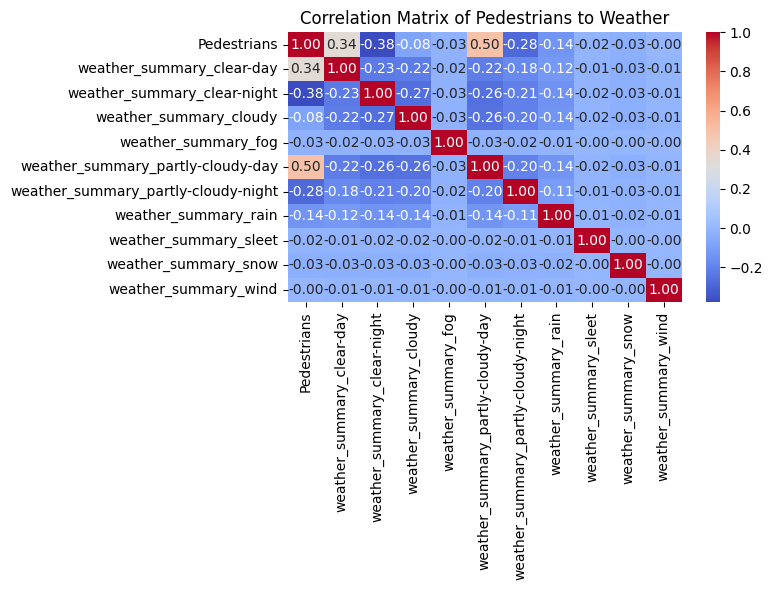

In [80]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pedestrians to Weather')
plt.tight_layout()
plt.show()

Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

In [ ]:
#custom function to categorize time of day into morning, afternoon, evening, and night,
def time_of_day(hour):
  """Transforms 'hour' column into morning, afternoon, evening, or night."""
  if 5 <= hour < 12:
    return 'Morning'
  elif 12 <= hour < 17:
    return 'Afternoon'
  elif 17 <= hour < 21:
    return 'Evening'
  else:
    return 'Night'

#create new time_of_day column with output from time_of_day function
df_2019['time_of_day'] = df_2019['hour'].apply(time_of_day)

#df_2019.sample(10)

In [89]:
# Analyze pedestrian activity patterns throughout the day
times = [ 'Morning', 'Afternoon', 'Evening', 'Night']
pedestrian_activity_by_time = df_2019.groupby('time_of_day')['Pedestrians'].sum().reindex(times)
pedestrian_activity_by_time

,Pedestrians
time_of_day,
Morning,1432408
Afternoon,3277151
Evening,1265781
Night,35834


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='time_of_day'>

Text(0.5, 1.0, 'Total Pedestrian Counts by Time of Day')

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Pedestrian Count')

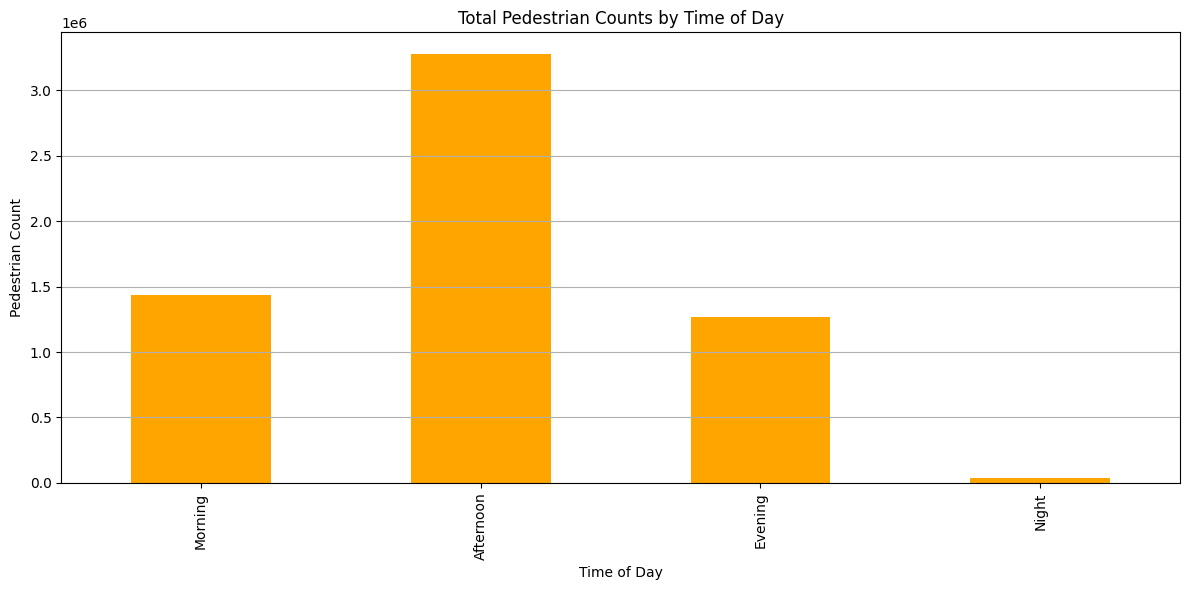

In [90]:
# Aggregating pedestrian counts by hour and plotting a bar graph
plt.figure(figsize=(12, 6))
pedestrian_activity_by_time.plot(kind='bar', color='orange')
plt.title('Total Pedestrian Counts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Pedestrian Count')
plt.grid(axis='y')  #grid created alone y axis
plt.tight_layout()
plt.show()